 # GEO data processing

![](./images/Module1/Data_Processing.jpg)

## Learning Objectives:
1. Understand the type of data that is accessible from GEO.
2. Demonstrate how to navigate the GEO website, search for dataset using accession number, and select samples.
3. Use command-line to download data from GEO.
4. Perform data pre-processing, normalization, loading and saving expression matrix.

## Accessing public GEO sequencing data
The Gene Expression Omnibus (GEO) is a public repository that archives and freely distributes comprehensive sets of microarray, next-generation sequencing, and other forms of high-throughput functional genomic data submitted by the scientific community. In addition to data storage, the website provides set of web-based tools and applications to help users query and download the studies and gene expression patterns stored in GEO.
### Searching and accessing data on GEO
Searching for GEO is relatively straight forward. First, users need to navigate to
<a href="https://www.ncbi.nlm.nih.gov/geo/"> https://www.ncbi.nlm.nih.gov/geo/</a>.
There are multiple ways to search datasets but the simplest way is to provide the accession number in the search box. We will use an example dataset with the accession number
<a href="https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE48350">GSE48350</a> for demonstration.
The GEO website interface with searching procedure of the example dataset is shown in the figure below:
![](./images/Module1/GEO_Website.png)

When the searching process is done, a webpage with detailed record of the example dataset such as published date, title, organism, experiment type, dataset summary etc. will be shown in the figure below:

![](./images/Module1/GEO_Dataset_Page.png)

We can see that the dataset GSE48350 was published in Apr 21, 2014 which focuses on Human Alzheimer's
Disease using microarray sequencing technology. Samples were primary collected from 4 brain regions:
hippocampus (HC), entorhinal cortex (EC), superior frontal cortex (SCG), post-central gyrus (PCG)
of normal and disease patients.

In [3]:
suppressMessages({
suppressWarnings(library(IRdisplay))
suppressWarnings(IRdisplay::display_html(data = NULL, file = "./Quizzes/Quiz_Submodule1.html"))
})

<!DOCTYPE html>
 
 
 

 Quiz_Submodule1

## Accessing GEO data using R command line
### Downloading and pre-processing the data

If users have a programming background, they can use R's command line to automate the download. Getting data from GEO is really quite easy using <a href="https://bioconductor.org/packages/release/bioc/html/GEOquery.html">GEOquery</a> R package available in <a href="https://bioconductor.org/">Bioconductor</a>. Before starting, user will need to install the GEOquery package using the following command.

In [2]:
suppressMessages({if (!require("BiocManager", quietly = TRUE))
    suppressWarnings(install.packages("BiocManager"))
    suppressWarnings(BiocManager::install("GEOquery", update = F))
})

We can use the `getGEO` function from the `GEOquery` package to download GEO dataset. First, users have to specify the accession ID of the dataset. For this demonstration, we will use the same dataset `GSE48350`.

In [5]:
suppressMessages(library("GEOquery"))
## change my_id to be the dataset that you want.
accession_ID <- "GSE48350"
suppressMessages({gse <- getGEO(accession_ID,GSEMatrix =TRUE, AnnotGPL=TRUE)})

Some datasets on GEO may be derived from different microarray platforms. Therefore the object `gse` can be a list of different datasets.
You can find out how many platforms were used by checking the length of the `gse` object.

In [8]:
## check how many platforms used
if (length(gse) > 1) idx <- grep("GPL570", attr(gse, "names")) else idx <- 1
data <- gse[[idx]]
print(paste0("Number of platforms: ",length(data)))

[1] "Number of platforms: 1"


The result shows that we have only one dataset that belongs to microarray platform mentioned GEO dataset page.
Next, we can access the samples information and genes using the command below:

In [9]:
# Get the samples information
samples <- pData(data)
# Get the genes information
genes <- fData(data)
# Check the number of samples and genes
print(paste0("The dataset contains ", dim(samples)[1] ," samples and ",dim(genes)[1]," genes"))

[1] "The dataset contains 253 samples and 54675 genes"


In [4]:
suppressMessages({
suppressWarnings(library(IRdisplay))
suppressWarnings(IRdisplay::display_html(data = NULL, file = "./Quizzes/Quiz_Submodule1-1.html"))
})

<!DOCTYPE html>
 
 
 

 Quiz_Submodule1-1

The ```samples``` contain the metadata of each sample such as title, status, GEO accession, submission data etc. while the ```genes```
dataframe show us the probeID, title, gene symbol, gene ID, and many more. We can inspect the detail of the first several rows and columns
of ```samples``` and ```genes``` dataframe using the following command:

In [10]:
samples[1:5,1:4]
genes[1:5,1:5]

,title,geo_accession,status,submission_date
,<chr>,<chr>,<chr>,<chr>
GSM300166,PostcentralGyrus_female_91yrs_indiv10,GSM300166,Public on Oct 09 2008,Jun 25 2008
GSM300167,SuperiorFrontalGyrus_female_91yrs_indiv10,GSM300167,Public on Oct 09 2008,Jun 25 2008
GSM300168,Hippocampus_female_96yrs_indiv105,GSM300168,Public on Oct 09 2008,Jun 25 2008
GSM300169,Hippocampus_male_82yrs_indiv106,GSM300169,Public on Oct 09 2008,Jun 25 2008
GSM300170,Hippocampus_male_84yrs_indiv108,GSM300170,Public on Oct 09 2008,Jun 25 2008


,ID,Gene title,Gene symbol,Gene ID,UniGene title
,<chr>,<chr>,<chr>,<chr>,<chr>
1007_s_at,1007_s_at,microRNA 4640///discoidin domain receptor tyrosine kinase 1,MIR4640///DDR1,100616237///780,
1053_at,1053_at,replication factor C subunit 2,RFC2,5982,
117_at,117_at,heat shock protein family A (Hsp70) member 6,HSPA6,3310,
121_at,121_at,paired box 8,PAX8,7849,
1255_g_at,1255_g_at,guanylate cyclase activator 1A,GUCA1A,2978,


To inspect the expression data of the first few rows and samples, we can use this command

In [11]:
head(exprs(data)[,1:5])

,GSM300166,GSM300167,GSM300168,GSM300169,GSM300170
1007_s_at,0.8880162,1.4355185,1.6096015,1.754960,1.820730
1053_at,0.6664604,0.8858521,1.8590777,1.036666,1.421393
117_at,0.8596384,1.0620298,3.0973945,2.243655,5.060301
121_at,0.9751495,1.0507448,0.9822838,1.198237,1.039529
1255_g_at,0.4912547,0.5375254,3.1796446,1.514290,2.185801
1294_at,0.8344268,0.9291890,1.5193694,1.557089,1.641263


### Downloading data using web-interface
At the bottom of the dataset page, users will find additional information about the dataset such as sequencing platform, number of samples, project ID and links to download the expression data.
The exact places to find this information are shown in the figure below:

![](./images/Module1/Manual_Download.png)

The dataset GSE48350 was sequenced using Affymetrix Human Genome U133 Plus 2.0 Array and the whole dataset contains 253 samples. The summary table at the bottom of the page show the all the data generated from the experiment. Users can click to "(http)" hyperlink to download all the samples or click "(custom)" to select and download the samples of interest. Note that, expression data download from this step is raw data and additional data processing needs to be done locally for further analysis.

The `summary` function can then be used to print the distributions of each sample and
the `range` function can help to check for the expression value range.

In [14]:
summary(exprs(data)[,1:5])
range(exprs(data))


   GSM300166          GSM300167          GSM300168         GSM300169       
 Min.   :  0.0100   Min.   :  0.0100   Min.   : 0.0100   Min.   : 0.01942  
 1st Qu.:  0.6366   1st Qu.:  0.6519   1st Qu.: 0.3342   1st Qu.: 0.32045  
 Median :  0.8622   Median :  0.8828   Median : 0.7756   Median : 0.75063  
 Mean   :  0.9193   Mean   :  0.9492   Mean   : 0.9274   Mean   : 0.87928  
 3rd Qu.:  1.0903   3rd Qu.:  1.0880   3rd Qu.: 1.1929   3rd Qu.: 1.15987  
 Max.   :335.6746   Max.   :531.7116   Max.   :99.4657   Max.   :26.46015  
   GSM300170       
 Min.   : 0.01098  
 1st Qu.: 0.32324  
 Median : 0.77234  
 Mean   : 0.93768  
 3rd Qu.: 1.21978  
 Max.   :83.41583  

[1]    0.010 1438.763

Features  Samples 
   54675      253

From the summary of the data above, we clearly see that the maximum expression values can be in the scale of thousands while the average expression values in each sample are below one. Therefore, pre-processing and normalization are required for quality assurance. One common step is to perform quartile filtering to remove the outlier and missing expression values. Also, we will need to perform a $log_2$ transformation to ensure the distributions of all samples are similar. Then, a `boxplot` can also be generated to see if the data have been correctly normalized. We can use the sample code below to perform all of those steps.

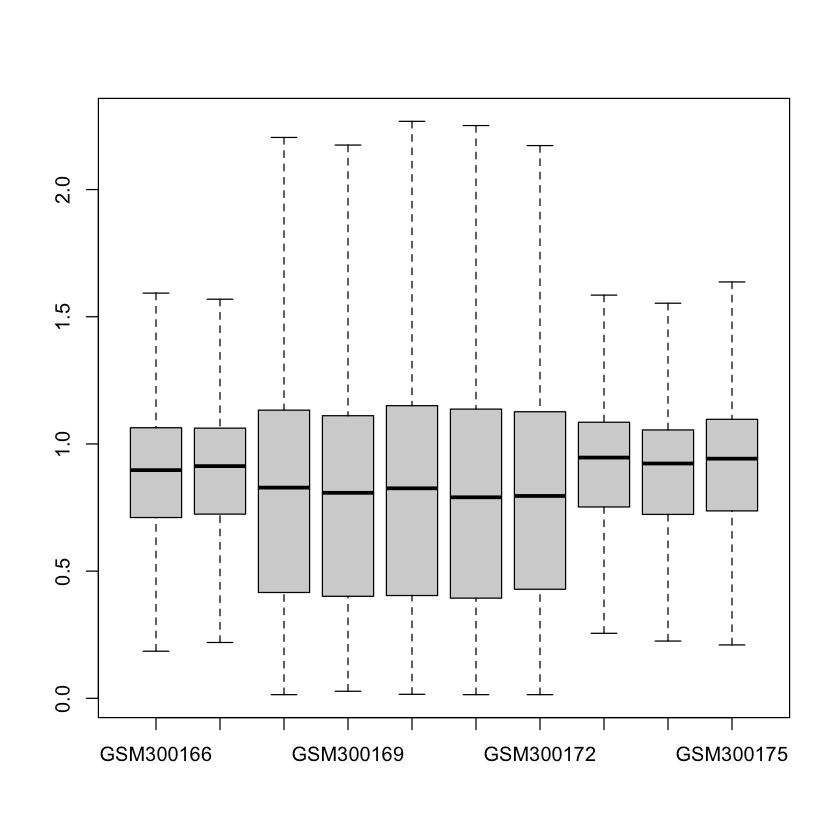

In [25]:
# Get expression matrix
expression_data <- exprs(data)
# Calculate data quantile and remove the NA value
qx <- as.numeric(quantile(expression_data, c(0., 0.25, 0.5, 0.75, 0.99, 1.0), na.rm=T))
LogC <- (qx[5] > 100) ||
  (qx[6]-qx[1] > 50 && qx[2] > 0)

# Replace negative values by NA and perform log transformation
if (LogC) {
   expression_data[which(expression_data <= 0)] <- NaN #
    norm_expression_data <- log2(expression_data+1)
}
# Plot the boxplot of 10 samples
boxplot(norm_expression_data[,1:10],outline=FALSE)

In [1]:
suppressMessages({
suppressWarnings(library(IRdisplay))
suppressWarnings(IRdisplay::display_html(data = NULL, file = "./Quizzes/Quiz_Submodule1-2.html"))
})

<!DOCTYPE html>
 
 
 

 Quiz_Submodule1-2

### Samples and groups selection
In this learning course, we focus on analyzing two groups: *disease* and *control* from the *entorhinal cortex* region of the ```GSE48350``` dataset . Therefore, we need to select the samples
that belong to *entorhinal cortex* region and form a group that has two classes. To select the samples that belong to the *entorhinal cortex*, we can use the following command:

In [28]:
# Select sample from Entorhinal Cortex region
idx <- grep("entorhinal", samples$`brain region:ch1`)
samples = samples[idx,]
# Get expression and normalized expression data for samples collected from entorhinal cortex region
expression_data = expression_data[,idx]
norm_expression_data = norm_expression_data[,idx]

To check how many samples belong to the *entorhinal cortex* region, we can use the following command:

In [29]:
# Print out new number genes and samples
print(paste0("#Genes: ",dim(norm_expression_data)[1]," - #Samples: ",dim(norm_expression_data)[2]))

[1] "#Genes: 54675 - #Samples: 54"


In order to perform Differential Expression analysis in the later submodule, we need to group patients into two groups: “disease” and “control”. From the samples source name, patients diagnosed with Alzheimer’s Disease are annotated with ‘AD’.
Therefore, any samples that contain string ‘AD’ are labelled by ‘d’ (condition/disease) and the remaining samples are assigned to ‘c’ (control/normal).
The code to group the samples is presented below:

In [31]:
# Select disease samples
disease_idx <- grep("AD", samples$source_name_ch1)
# Create a vector to store label
groups <- rep("X", nrow(samples))
# Annotate disease samples as "d"
groups[disease_idx] <- "d"
# Control samples are labeled as "c"
groups[which(groups!="d")] <- "c"
groups <- factor(groups)

To see the number of *control* and *disease*, we can use the following command:

In [32]:
table(groups)

groups
 c  d 
39 15 

## Exporting the data
When we have successfully retrieved expression data from GEO, we can export the expression data to a `.csv` file format for inspection in other software such as Excel using the `write_csv` function from `readr` package.
In the code below, we will save the raw expression matrix, normalized expression matrix, and grouping information to  `.csv` files.

In [33]:
# Convert raw and normalized expression matrix to datafames and save them to the csv file
expression_data <- as.data.frame(expression_data)
norm_expression_data <- as.data.frame(norm_expression_data)
# Convert group to a dataframe
groups <- as.data.frame(groups)
# Create a sub-directory data folder to save the expression matrix if it is not available
dir <- getwd()
subDir <- "/data"
path <- paste0(dir,subDir)
if (!file.exists(path)){
    dir.create(file.path(path))
}
# Save expresion values and group to the csv files format in the local folder
write.csv(expression_data, file="./data/raw_GSE48350.csv")
write.csv(norm_expression_data, file="./data/normalized_GSE48350.csv")
write.csv(groups, file="./data/groups_GSE48350.csv")

The `.csv` format is a very simple format that might not suitable to store big datasets.
We can export the expression data to `.rds` format, which is more memory efficient for loading and saving the data.
We can save all the relevant data in a `list` and write to the disk using the built in `saveRDS` function.

In [35]:
# Putting raw data, normalized data, and groups into a list
dat <- list(expression_data = expression_data, norm_expression_data = norm_expression_data, groups = groups)
# Save the data to the local disk using rds format
saveRDS(dat, file="./data/GSE48350.rds")


The user can copy the data from the local disk to the Bucket using the `gsutil cp` command on the Vertex AI Workbench terminal.
To do this, the user has to click on the `+` symbol beside the name of the current tab in the vertex AI workbench interface to open a new Launcher tab.
The next step is to click on `$_Terminal` open a Terminal and then type out the `gsutil cp` command below.
The first parameter `./data/GSE48350.rds` is the file we want to copy and `cpa-output` is the name of our destination Bucket, which should be replaced with the name of the user's Cloud Bucket.

```{admonition} Saving data to the Google Cloud Bucket
gsutil cp ./data/GSE48350.rds gs://cpa-output
```

## Gene ID mapping

![](./images/Module1/Gene_ID_Conversion.jpg)
## Learning Objectives:
1. Understand different probe set ID.
2. Map probe IDs into gene identifiers and symbols.

## Understanding different probe set ID

Gene set or pathway analysis requires that gene sets and expression data use the same type of gene ID
(Entrez Gene ID, Gene symbol or probe set ID etc). However, this is frequently not true for the data we have.
For example, our gene sets mostly use Entrez Gene ID, but microarray datasets are frequently labeled by probe
set ID (or RefSeq transcript ID, etc.). Therefore, we need to map the probe set IDs to Entrez gene ID.
Here, we will use `GSE48350` dataset that we have used in the previous section for demonstration of gene ID mapping.
In order to know what kind of probe set ID, we need to navigate to GEO record page of `GSE48350`. Under the `Platform`
tab, we can find the probe ID information.
![probID](./images/Module1/ProbeID.png)

From the record page, we know that the dataset was generated from 1 platform using the Affymetrix Human Genome U133 Plus 2.0 Array.
To convert or map the probe set IDs to Entrez gene ID, we need to find the corresponding annotation package from
<a href="https://bioconductor.org/">Bioconductor</a>. For analyzed data, we need to use the `hgu133plus2.db` and `AnnotationDbi` databases.
We can install the package using following R command:

In [36]:
suppressMessages({if (!require("BiocManager", quietly = TRUE))
    suppressWarnings(install.packages("BiocManager"))
    suppressWarnings(BiocManager::install("hgu133plus2.db", update = F))
    suppressWarnings(BiocManager::install("AnnotationDbi", update = F))
})

In the data processing section, we successfully downloaded the dataset `GSE48350` and saved it to the `data` sub-directory.
Now we can load the dataset and check for the Probe Set ID names by using the following command.

In [37]:
data = readRDS("./data/GSE48350.rds")
expression_data = data$expression_data
probeIDs = rownames(expression_data)
head(probeIDs)

[1] "1007_s_at" "1053_at"   "117_at"    "121_at"    "1255_g_at" "1294_at"

## Mapping probe IDs into gene identifiers and symbols.
For pathway analysis, databases like Gene Ontology and KEGG use gene symbol annotation. Therefore, Probe set IDs should be mapped to gene symbol to be used in the later submodules. We can use the pre-annotated databases which are available from Bioconductor to map the probe IDs to the gene symbol. `AnnotationDbi` is an R package that provides an interface for connecting and querying various annotation databases using SQLite data storage while `hgu133plus2.db` is database to perform Probe IDs to gene symbol mapping for human data. We can use the following command to map the Probe set IDs:

In [2]:
suppressMessages({
  library(hgu133plus2.db)
  library(AnnotationDbi)
})

In [3]:
suppressMessages({
annotLookup <- AnnotationDbi::select(hgu133plus2.db, keys = probeIDs, columns = c('PROBEID','GENENAME','SYMBOL'))
})

ERROR: Error in .testForValidKeys(x, keys, keytype, fks): object 'probeIDs' not found


In [ ]:
head(annotLookup)

In [2]:
suppressMessages({
suppressWarnings(library(IRdisplay))
suppressWarnings(IRdisplay::display_html(data = NULL, file = "./Quizzes/Quiz_Submodule1-3.html"))
})

<!DOCTYPE html>
 
 
 

 Quiz_Submodule1-3

We can check the number of probe IDs that mapped to the unique gene symbols using the following command:

In [21]:
# Check number of the probe IDs
print(paste0("There are ",length(unique(annotLookup$PROBEID))," probe IDs that mapped to ",length(unique(annotLookup$SYMBOL))," gene symbols"))

[1] "There are 54675 probe IDs that mapped to 22243 gene symbols"


From the lookup table we can spot that a single gene symbol can be mapped to multiple probe IDs. In the next submodule, we will discuss how these mapped gene symbols can be used to identify which genes are differentially expressed. 
